In [ ]:
%pip install plotly
%pip install nbformat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


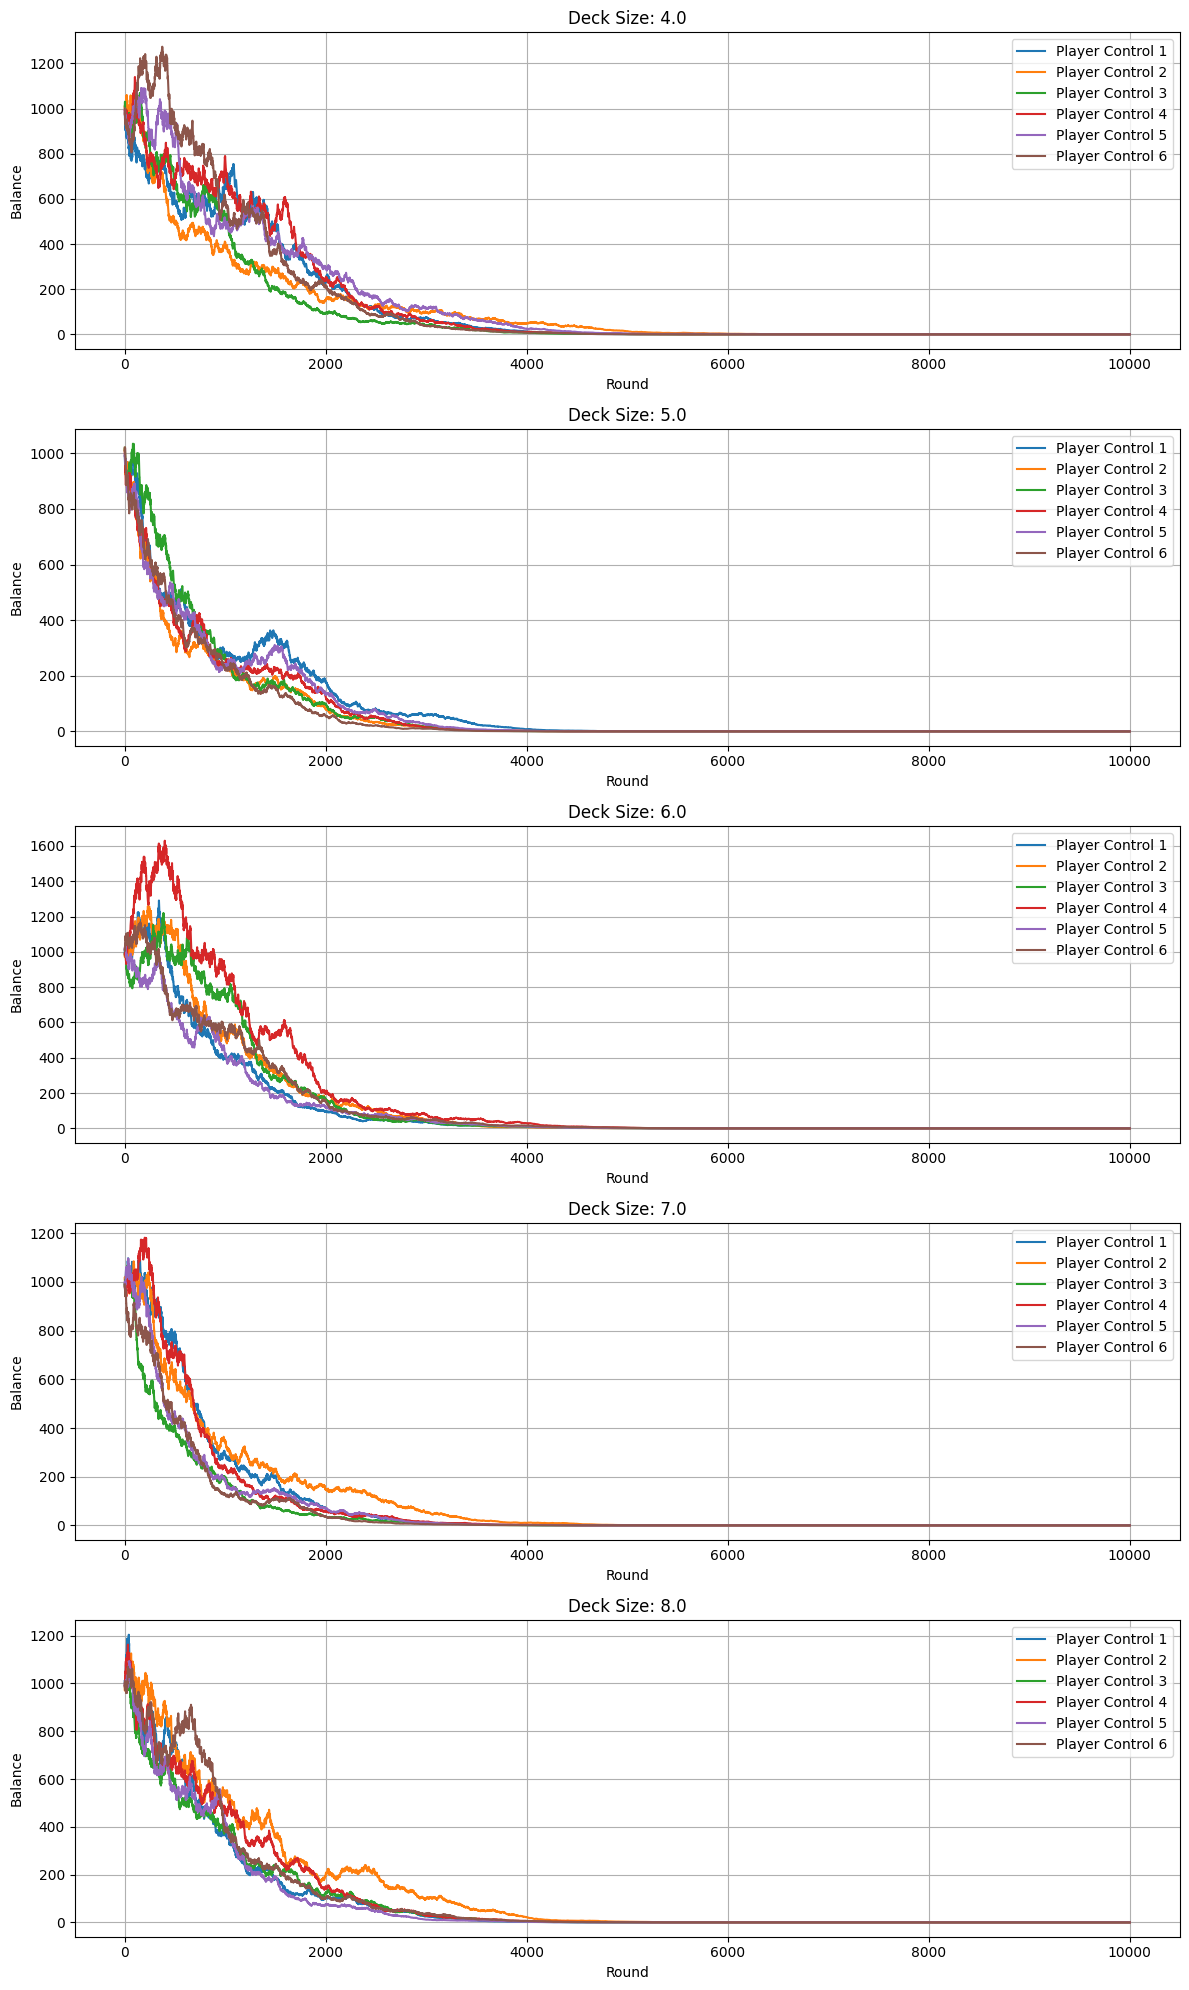

In [ ]:
"""#Control group - six players with control strategy over 10,000 rounds"""
results = pd.read_csv("Control_BaseStratOnly.csv")

# Group the data by deck size and player
grouped_results = results.groupby(['name', 'decks'])

# Create a figure with subplots for each deck size
unique_deck_sizes = results['decks'].unique()
fig, axes = plt.subplots(len(unique_deck_sizes), 1, figsize=(12, 4*len(unique_deck_sizes)))

# Plot balance over rounds for each deck size
for idx, deck_size in enumerate(unique_deck_sizes):
    deck_data = results[results['decks'] == deck_size]
    
    # Plot each player's balance
    for player in deck_data['name'].unique():
        player_data = deck_data[deck_data['name'] == player]
        axes[idx].plot(player_data['round'], player_data['balance'], label=f'Player {player}')
    
    axes[idx].set_title(f'Deck Size: {deck_size}')
    axes[idx].set_xlabel('Round')
    axes[idx].set_ylabel('Balance')
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

""" NOTES """
"""
Unfavorable over time- makes sense bc of
Law of large numbers
- As the number of rounds increases, the average outcome will converge to the expected value.
since the delaer has a slight advantage, the player's balance will tend to decrease over time.
- The longer the game is played, the more pronounced this effect becomes.

Deck size seems to be irrevalant
No matter if its 4 or 8 decks, they all follow the same trend
Current strategy only looks the hand, and nothing else

however, who is really gonna play 5,000 rounds of blackjack in one sitting?

Absolute max amount of time a person would play blackjack is 5 hours.
Assuming 1 hand per 30 seconds, that is 600 hands.
"""

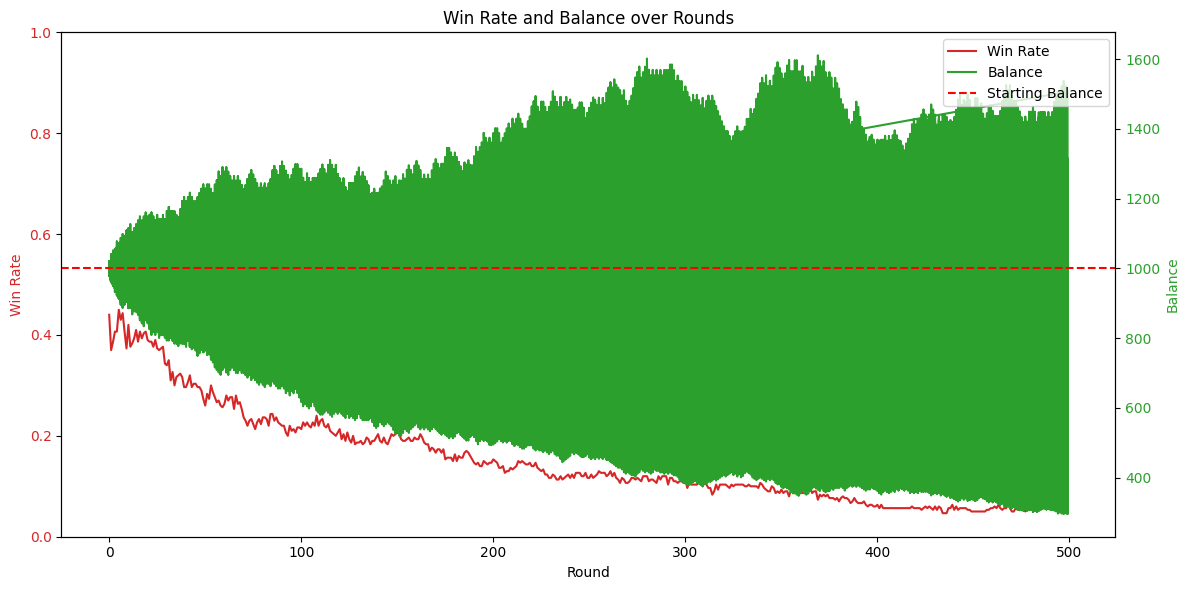

'\n\n\n'

In [ ]:
"""
Control group - six players with control strategy over 500 rounds
More realistic length
This is a more realistic length for a blackjack game, as it simulates a shorter session.

6 decks - most common at blackjack tables

"""
import random
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())  # or mcolors.BASE_COLORS, mcolors.CSS4_COLORS

results = pd.read_csv("Control_BaseStratOnly_500R6D.csv")

win_rate = []

for i in range(500):
    round = results[results["round"] == i]
    win = round[round["win"]==1]
    lose = round[round["lose"] ==1]
    win_rate.append({"round":i, "wins": len(win), "losses": len(lose), "win_rate": len(win) / 300})

win_rate_df = pd.DataFrame(win_rate)
win_rate_df["round"] = win_rate_df["round"].astype(int)

fig, ax1 = plt.subplots(figsize=(12, 6))

color = random.choice(colors)
ax1.set_xlabel('Round')
ax1.set_ylabel('Win Rate', color=color)
ax1.plot(win_rate_df["round"], win_rate_df["win_rate"], color=color, label="Win Rate")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 1])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color2 = random.choice([c for c in colors if c != color])
ax2.set_ylabel('Balance', color=color2)  # we already handled the x-label with ax1
ax2.plot(results["round"], results["balance"], color=color2, label="Balance")
ax2.tick_params(axis='y', labelcolor=color2)
ax2.axhline(y=1000, color='red', linestyle='--', label='Starting Balance')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Win Rate and Balance over Rounds')
plt.tight_layout()
plt.show()

""" NOTES """
"""


"""